In [1]:
import sys
import os
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, root_dir)

from scripts.aggregate_data import dumps_aggregated
from scripts.find_dumps import convert_unix_to_utc_plus_3

KeyboardInterrupt: 

In [ ]:
dfs=dumps_aggregated('BTCUSDT','15s')
print(dfs[0].head())

d:\Inno\Course2\Capstone\ATS_ML\scripts\aggregate_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unix'] = (df['unix'] // period_ms) * period_ms
d:\Inno\Course2\Capstone\ATS_ML\scripts\aggregate_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unix'] = (df['unix'] // period_ms) * period_ms
d:\Inno\Course2\Capstone\ATS_ML\scripts\aggregate_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

            unix       agg_Low  agg_Volume  agg_Taker volume delta  \
0  1717424700000  69742.765333     5.96307                 4.55763   
1  1717424715000  69749.042667     5.93790                -2.23826   
2  1717424730000  69722.495333     9.34752                -3.81748   
3  1717424745000  69742.028667     8.87643                 3.15413   
4  1717424760000  69765.914000     6.72045                -3.29387   

                                              trades  
0  [{'price': 69740.01, 'quantity': 0.00826, 'tak...  
1  [{'price': 69744.25, 'quantity': 0.01045, 'tak...  
2  [{'price': 69742.42, 'quantity': 0.003, 'taker...  
3  [{'price': 69728.0, 'quantity': 0.0032, 'taker...  
4  [{'price': 69759.0, 'quantity': 0.00093, 'take...  


In [ ]:
# Amount trades happend in 15 seconds
print(len(dfs[0]['trades'].iloc[0]))

102


In [ ]:
# Total length of dump
for df in dfs:
    print(convert_unix_to_utc_plus_3(df['unix'].iloc[0]),convert_unix_to_utc_plus_3(df['unix'].iloc[-1]), (df['unix'].iloc[-1]-df['unix'].iloc[0])//60000, "minutes")

2024-06-03 17:25:00+03:00 2024-06-03 17:55:00+03:00 30 minutes
2024-06-07 20:50:00+03:00 2024-06-07 21:15:00+03:00 25 minutes
2024-06-11 04:50:00+03:00 2024-06-11 05:15:00+03:00 25 minutes
2024-06-12 22:20:00+03:00 2024-06-12 22:50:00+03:00 30 minutes
2024-06-14 19:00:00+03:00 2024-06-14 19:10:00+03:00 10 minutes


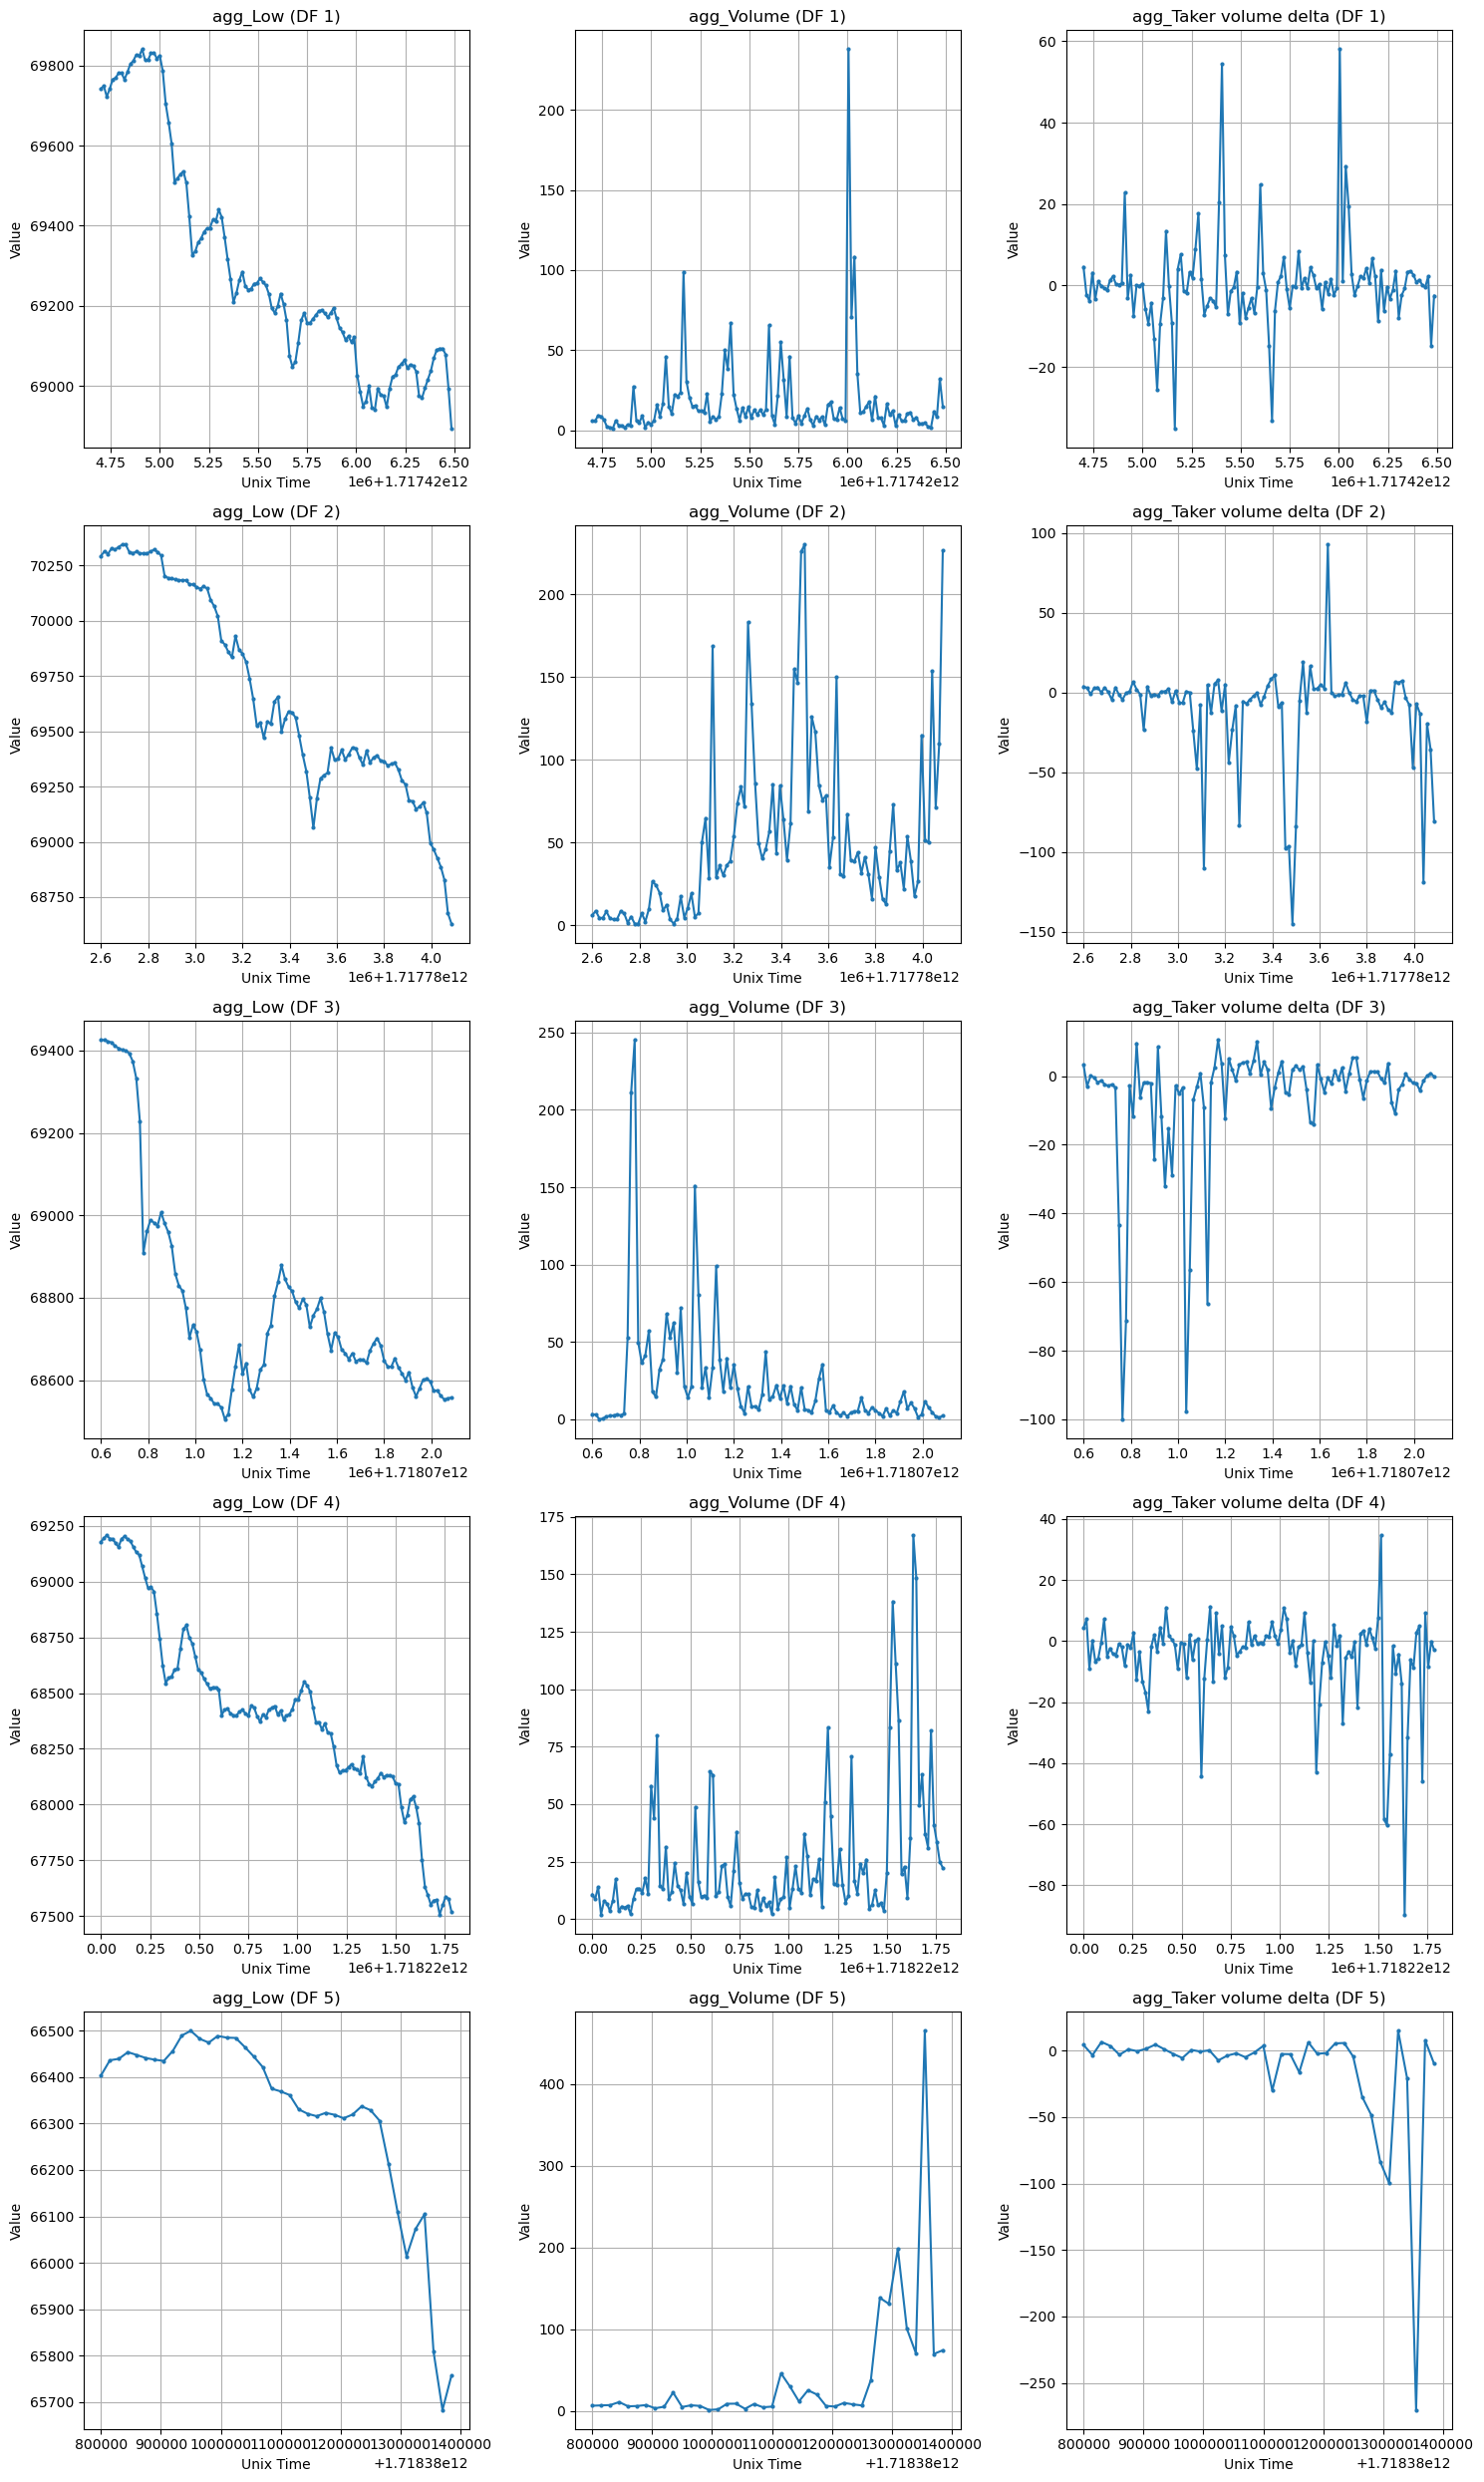

In [ ]:
import matplotlib.pyplot as plt
columns_to_plot = ['agg_Low', 'agg_Volume', 'agg_Taker volume delta']

# Number of DataFrames and columns to plot
num_dfs = len(dfs)
num_columns = len(columns_to_plot)

# Create a figure with subplots
fig, axes = plt.subplots(num_dfs, num_columns, figsize=(15, 5 * num_dfs))

# Iterate over each column and DataFrame to plot
for j, column in enumerate(columns_to_plot):
    for i, df in enumerate(dfs):
        # Plot all values except the last one with smaller markers
        axes[i, j].plot(df['unix'][:-1], df[column][:-1], marker='.', linestyle='-', markersize=4)
        axes[i, j].set_xlabel('Unix Time')
        axes[i, j].set_ylabel('Value')
        axes[i, j].set_title(f'{column} (DF {i+1})')
        axes[i, j].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Indeed, we see similar pattern in !every situation during dump ending:
- price drops drastically
- Volume grows
- Taker volume delta drops 

See png picture for highlighted patterns. Algorithm should learn them

How much in advance before buy label? - tolerance. (3=final dump, 5=a bit before falling)

How much after buy label? period[1]+unix(300_000=5m)